<a href="https://colab.research.google.com/github/sndaba/DepressionPrediction/blob/main/depressionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Depression Prediction**

Depression is a prevailing mental disturbance affecting
an individual’s thinking and mental development.
According to WHO in 2022, approximately 1 billion people have mental disorders and over 300 million people suffer from depression worldwide. Depression prevails in suicidal thoughts in an individual. Around
800,000 people commit suicide annually. Therefore, it requires a comprehensive response to deal with the burden of mental health issues.
NPOs like Botswana Network for Mental Health and Embrace Emotions Support Network in Botswana, and UK organisations like Mind and Depression UK offer counseling and psychological therapies to help individuals and families dealing with depression. Machine learning aims at creating algorithms that are equipped with the ability to train themselves to perceive complex patterns. This ability helps to find solutions to new problems by using previous data and solutions.                                                      <br>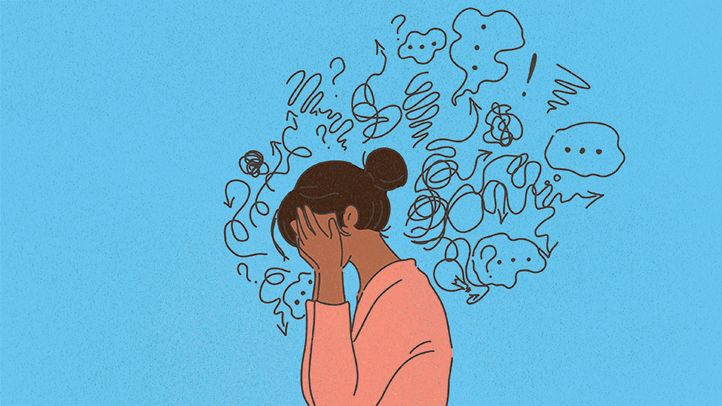

#####**Importing required libraries**<br>
Pandas and Numpy librariares were used for data manipulation of the dataset which is a data frame.


In [ ]:
# importing Python libraries
import pandas as pd                 #data analysis and manipulation
import numpy as np                  #numerical calculation
import matplotlib.pyplot as plt     #plot display

#####**Loading local file**<br>
file involved and uploading the depression dataset to colab

In [ ]:
# importing the dataset
from google.colab import files
uploaded = files.upload()

Saving b_depressed.csv to b_depressed (5).csv


#####**Saving and reading from file**

In [ ]:
import io     #i/o module
data = pd.read_csv(io.BytesIO(uploaded['b_depressed.csv']))   #data can be kept as bytes in an in-memory buffer when we use the io module’s Byte IO operations
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


#####**Dropping columns**

In [ ]:
data = data.drop(columns=['Survey_id', 'Ville_id'])

#####**File description**

In [ ]:
data.info()  # insights about the columns of this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1429 non-null   int64  
 1   Age                    1429 non-null   int64  
 2   Married                1429 non-null   int64  
 3   Number_children        1429 non-null   int64  
 4   education_level        1429 non-null   int64  
 5   total_members          1429 non-null   int64  
 6   gained_asset           1429 non-null   int64  
 7   durable_asset          1429 non-null   int64  
 8   save_asset             1429 non-null   int64  
 9   living_expenses        1429 non-null   int64  
 10  other_expenses         1429 non-null   int64  
 11  incoming_salary        1429 non-null   int64  
 12  incoming_own_farm      1429 non-null   int64  
 13  incoming_business      1429 non-null   int64  
 14  incoming_no_business   1429 non-null   int64  
 15  inco

#####**Exploratory Data Analysis**<br> 1. Missing Data

In [ ]:
data.isnull().sum()  # any missing values

NameError: ignored

In [ ]:
data = data.dropna()  # drop these nulll values

#####**Check for duplicates**

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1424    False
1425    False
1426    False
1427    False
1428    False
Length: 1409, dtype: bool

#####**Exploratory Data Analaysis** <br>2. Depression Balance

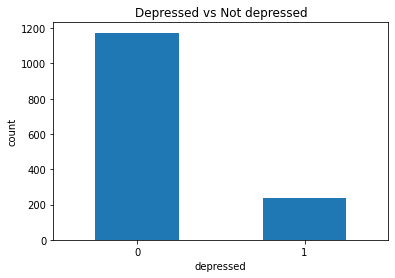

In [ ]:
data.depressed.value_counts().plot(kind='bar')
plt.title('Depressed vs Not depressed')
plt.xlabel('depressed')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

#####**Exploratory Data Analysis**<br>3. Data Correlation

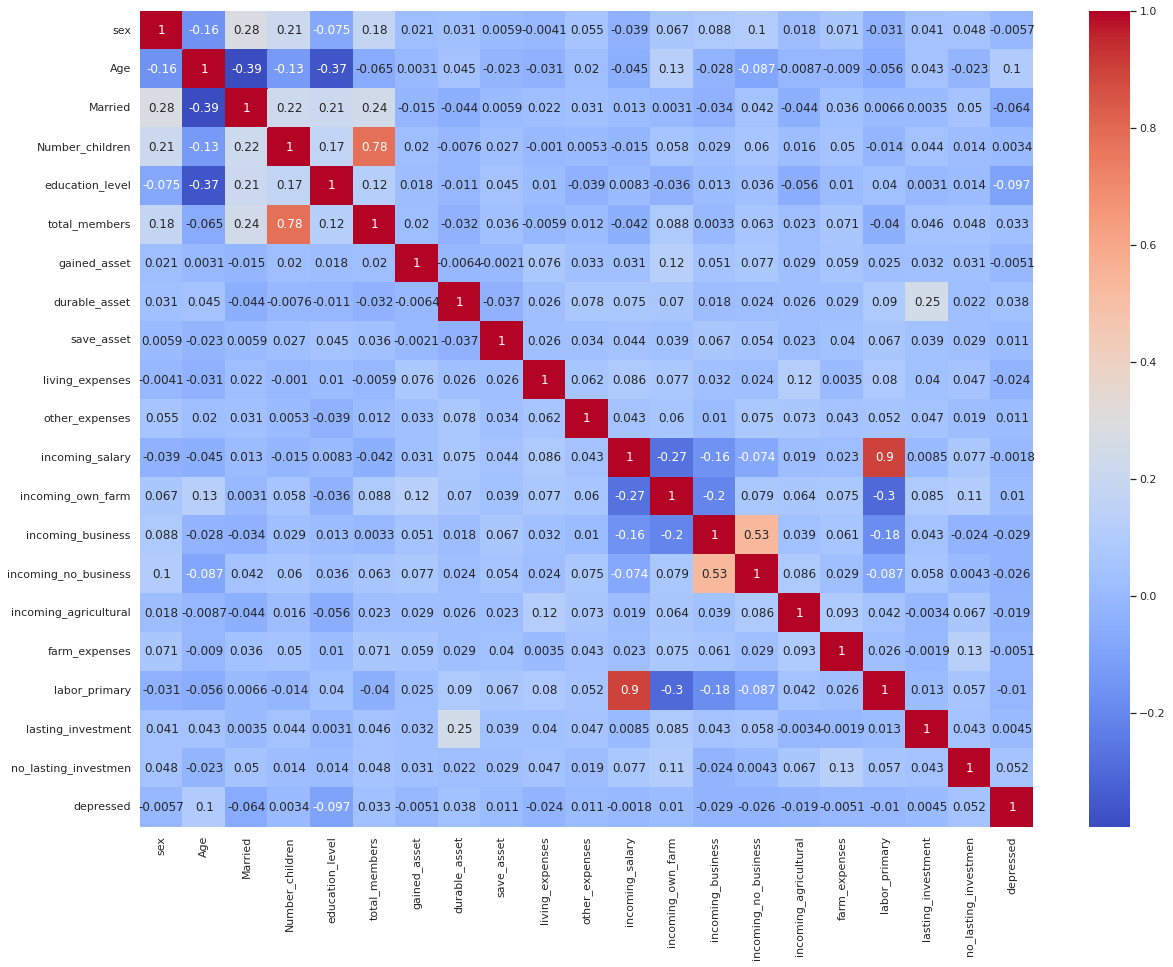

In [ ]:
# Checking correlation using Seaborn and Matplotlib for visualisation
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 15)})
sns.heatmap(data.corr(),cmap="coolwarm", annot=True)
plt.show()


#####**Feature Selection** <br>  1. Correlation Matrix

In [ ]:
data.corr()[['depressed']].sort_values(by='depressed', ascending=False)

,depressed
depressed,1.000000
Age,0.100126
no_lasting_investmen,0.051973
durable_asset,0.038323
total_members,0.033125
save_asset,0.011379
other_expenses,0.011107
incoming_own_farm,0.010019
lasting_investment,0.004459
Number_children,0.003406


#####**Feature Selection**<br> 2. Extra Trees Classifier

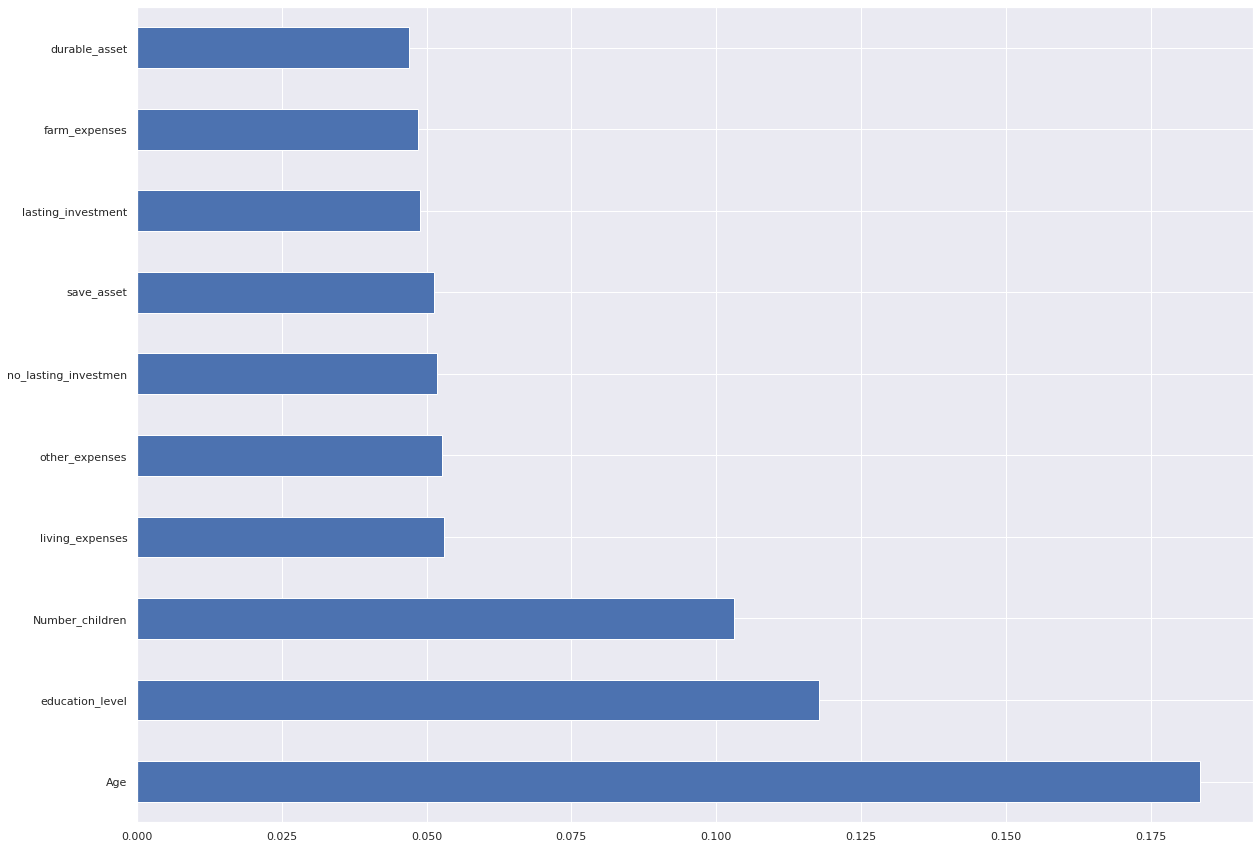

In [ ]:
#! pip install -U scikit-learn
from sklearn.ensemble import ExtraTreesClassifier

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
model = ExtraTreesClassifier(n_estimators = 25,criterion ='entropy', max_features = 5)
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh') #plot graph of feature importances for better visualization
plt.show()

#####**Feature Selection**<br>  3. Random Forest Importance

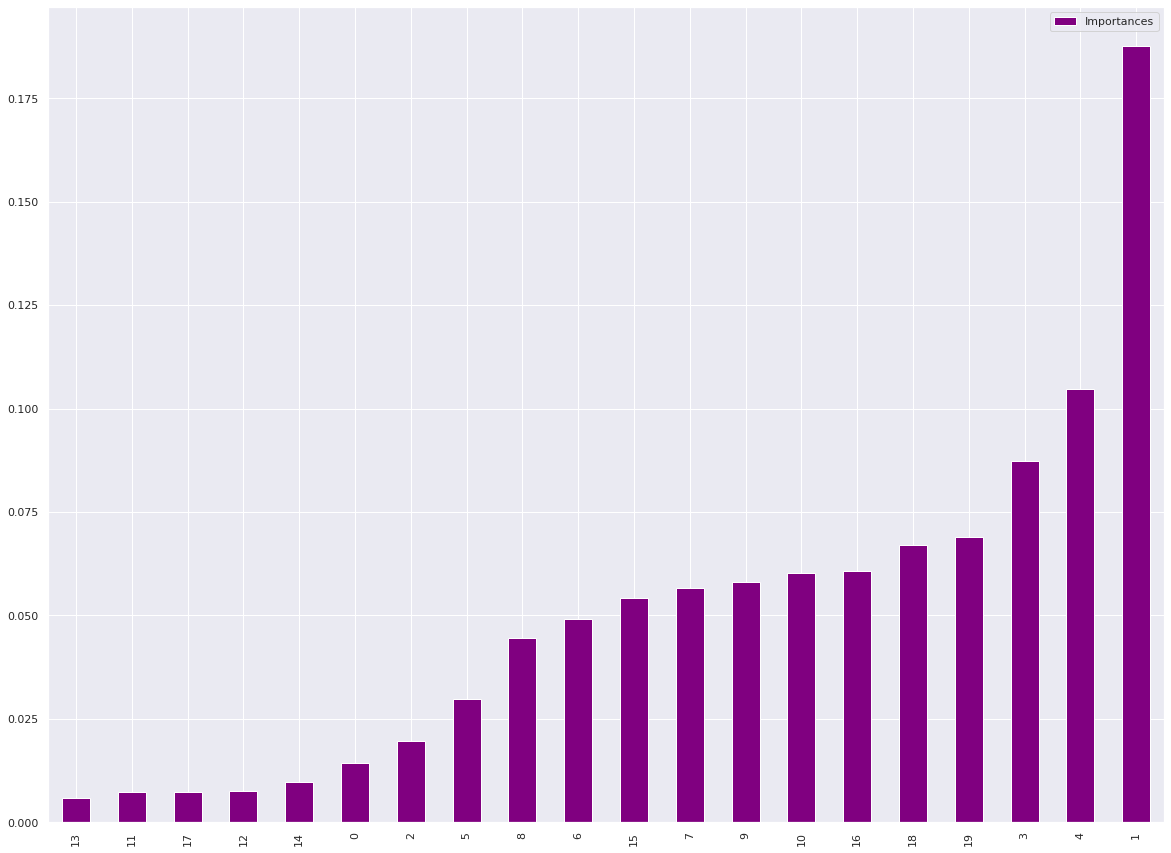

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)     #hyperparameter tuning
X = data.iloc[:,0:20]       #independent columns
y = data.iloc[:,-1]
model.fit(X,y)              #model fitting

importances = model.feature_importances_      #importance of features
rfc_data= pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances":importances})    #creating the dataframe graph
rfc_data.set_index("Importances")          #setting the dataframe using the columns
rfc_data=rfc_data.sort_values("Importances")    #sorting in ascending order
rfc_data.plot.bar(color = "purple")        #bar graph
plt.show()

#####**Splitting data into Training and Testing data**

In [ ]:
##Extracting Independent and dependent Variable
#features chosen using the Random Forest Importance
x = np.array(data[['Age','Number_children','education_level','lasting_investment','no_lasting_investmen','farm_expenses','other_expenses','save_asset','incoming_agricultural']])
y = np.array(data['depressed'])

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#####**Feature Scaling**

In [ ]:
#preprocessing
from sklearn.preprocessing import StandardScaler  #standardize the range of functionality of the input dataset
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

#####**Training the KNN model without class imbalance handling-SMOTE**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test).round() # Predicting the Test set results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("accuracy score is:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       301
           1       0.25      0.02      0.04        52

    accuracy                           0.85       353
   macro avg       0.55      0.50      0.48       353
weighted avg       0.76      0.85      0.79       353

[[298   3]
 [ 51   1]]
accuracy score is: 0.8470254957507082


#####**Class imbalanced technique-SMOTE on dataset**

In [ ]:
#Synthetic Minority Oversampling Technique- Oversampling
#!pip install -U imbalanced-learn
# importing SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))     #returns number
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 5)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 183
Before OverSampling, counts of label '0': 873 

After OverSampling, counts of label '1': 873
After OverSampling, counts of label '0': 873


#####**Training the Support Vector Machine model with SMOTE dataset - imbalanced class handling distribution**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

svc= SVC()

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001] }  #tuning the hyperparameters using Grid search
grid = GridSearchCV(svc,param_grid,refit=True,verbose=2)

grid.fit(X_train_res,y_train_res)
print(grid.best_params_) #best parameters
y_pred = grid.predict(x_test).round()

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("accuracy score is:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1

#####**Training the Random Forest Classifier model with SMOTE dataset - imbalanced class handling distribution**

In [ ]:
## Training the SVM model on the Training set
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=350 , random_state=42)
rfc.fit(X_train_res, y_train_res)
y_pred = rfc.predict(x_test).round() # Predicting the Test set results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("accuracy score is:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       301
           1       0.13      0.08      0.10        52

    accuracy                           0.79       353
   macro avg       0.49      0.50      0.49       353
weighted avg       0.75      0.79      0.77       353

[[275  26]
 [ 48   4]]
accuracy score is: 0.7903682719546742


#####**Training the KNN model with SMOTE dataset - imbalanced class handling distribution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(x_test).round() # Predicting the Test set results accomodating float variable "no_lasting_investment"
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("accuracy score is:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71       301
           1       0.16      0.44      0.24        52

    accuracy                           0.58       353
   macro avg       0.51      0.53      0.48       353
weighted avg       0.76      0.58      0.64       353

[[183 118]
 [ 29  23]]
accuracy score is: 0.5835694050991501
